In [37]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u, constants  as c
import os

pc = c.pc.cgs.value
kB  = c.k_B.cgs.value
Msun = c.M_sun.cgs.value
G = c.G.cgs.value
Myr = u.Myr.in_units("s")

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "text.latex.preamble" : r'\boldmath'
})

def _read_Ltot(pickle_path):
    """Function to read total luminosity from a pickle file."""
    with open(pickle_path, 'rb') as f:
        data = pickle.load(f)
    return data["simtime_Myr"], data["total_lumi"]

def _read_flux(pickle_path):
    """Function to read total flux from a pickle file."""
    with open(pickle_path, 'rb') as f:
        data = pickle.load(f)
    return data["simtime_Myr"], data["total_flux"]

cd_names = ["c000050", "c001670"]
cd_labels = [r"$3\times10^{19}\,\mathrm{cm}^{-2}$",
             r"$1\times10^{21}\,\mathrm{cm}^{-2}$"]
colors = ["C0", "C1"]

ctr = [-80*pc, -150*pc, 0*pc]
radius=120

# also load SN data file
SNe = np.loadtxt("datafiles/SNoutput.dat")

# select all SNe that occur within a radius of 100 pc around ctr
SN_rad = np.sqrt((SNe[:,1]-ctr[0])**2 + (SNe[:,2]-ctr[1])**2 + (SNe[:,3]-ctr[2])**2)/pc
idx1 = np.where(SN_rad < 100)
idx2 = np.where((SN_rad >=100) & (SN_rad < 150))

sn_internal = SNe[idx1][:,0]/Myr
sn_external = SNe[idx2][:,0]/Myr

SNx1t = sn_external[np.where((sn_external > 8.4) & (sn_external < 8.6))]
SNx2t = sn_external[np.where((sn_external > 9.8) & (sn_external < 10))]
SNx3t = sn_external[np.where((sn_external > 12) & (sn_external < 12.1))]
SNx4t = sn_external[np.where((sn_external > 12.8) & (sn_external < 12.9))]
print(SNx1t, SNx2t, SNx3t, SNx4t)

[8.52921493] [9.92701733] [12.05938935] [12.85952152]


In [33]:
print(sn_external)

[ 1.33317369  2.00089712  4.59707603  4.92998537  8.52921493  8.66244365
  8.7287711   8.86081341  9.92701733 10.45973505 12.05938935 12.85952152
 13.12438291 13.59127669 14.05707099 15.52360538 18.58827817 18.7215739
 22.11908427 22.45186949 24.45019895 24.91639718 25.84968841 28.58132462
 28.84799165 29.31427078 30.04734763 32.04564517 32.24479644 32.3781741
 32.44507117 32.64495862 32.9774152  34.31082966 34.84285234 35.50910925
 35.70961626 35.84337652 38.10766975 38.50747009 38.77354615 38.84034629
 40.63889282 41.23857179 42.03861707 42.83768389 43.17120462 43.37070683
 48.43363301 49.16749325 49.7663804  51.29826891 51.69817793 53.29774099
 57.02809197 57.09447933 58.36039949 58.42677117 58.49357144 58.5600622
 58.69347111 58.7604392  58.89387054 59.02652271 59.15952465 59.29328954
 59.42662164 60.15976766]


c000050
c001670


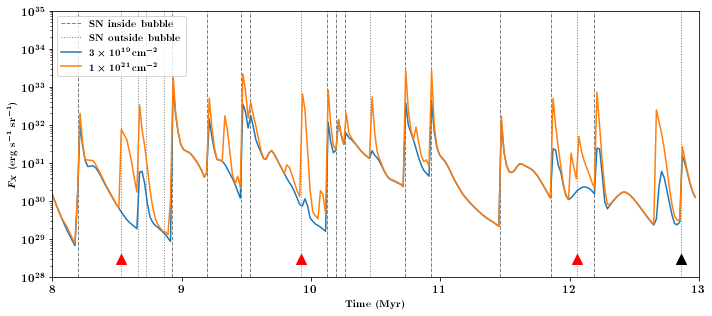

In [50]:
fig, ax = plt.subplots(figsize=(10, 4.5))

for time in sn_internal:
    ax.axvline(x=time, color='grey', linestyle='--', linewidth=1, label='\\textbf{SN inside bubble}' if time == sn_internal[0] else "")

for time in sn_external:
    ax.axvline(x=time, color='grey', linestyle=':', linewidth=1, label='\\textbf{SN outside bubble}' if time == sn_external[0] else "")

for i, cd, label in zip(range(6), cd_names, cd_labels):
    print(cd)
    global_times_lum = []
    global_Xlum = []
    global_times_flux = []
    global_flux = []

    for file_no in range(800, 1300, 2):
        pickle_path = "datafiles/data-01-20keV/SILCC_hdf5_plt_cnt_" + str(file_no).zfill(4) + "-r0150-" + cd + "-data.pkl"

        t_lum, L = _read_Ltot(pickle_path)
        t_flux, F = _read_flux(pickle_path)

        global_times_lum.append(t_lum)
        global_Xlum.append(L)
        global_times_flux.append(t_flux)
        global_flux.append(F)

    #ax.semilogy(global_times_lum, global_Xlum, label=f"Lum ({label})", color=colors[i], linestyle='-')
    #ax.semilogy(global_times_flux, global_flux, label=f"Flux ({label})", color=colors[i], linestyle='--')
    #ax.semilogy(global_times_lum, global_Xlum, label=label, color=colors[i], linestyle='-')
    ax.semilogy(global_times_flux, global_flux, label=label, color=colors[i], linestyle='-')

y0=3e28
ax.scatter(SNx1t, y0, marker="^", color="r", s=100, zorder=10)
ax.scatter(SNx2t, y0, marker="^", color="r", s=100, zorder=10)
ax.scatter(SNx3t, y0, marker="^", color="r", s=100, zorder=10)
ax.scatter(SNx4t, y0, marker="^", color="k", s=100, zorder=10)
#ax.arrow(x=SNx1t, y=y0, dx=0.0, dy=y0, width=0.03)
#for time in sn_times_200:
   # ax.axvline(x=time, color='blue', linestyle='--', linewidth=1, label='SN line' if time == sn_times_200[0] else "")

ax.legend(loc='upper left')#, bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=12)

ax.set_xlabel("\\textbf{Time~(Myr)}")
#ax.set_ylabel("$F_X~(\\mathrm{ergs\\,s^{-1}\\,sr^{-1}})~\\mathrm{[dashed]},~~L_X~(\\mathrm{ergs\\,s}^{-1})~\\mathrm{[solid]}$")
ax.set_ylabel("$F_X~(\\mathrm{erg~s^{-1}~sr^{-1}})$")

ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlim(8,13)
ax.set_ylim(1e28,1e35)
fig.tight_layout()
fig.savefig("plots/lumi-flux-SNe-radius-150.pdf", bbox_inches="tight")